In [2]:

#@ Imports for preprocessing data
import pandas as pd
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string

In [3]:

#@ Converting integers to strings to understand each label independently.
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'} 

In [4]:
import numpy as np

In [ ]:
raw_data = pd.read_csv('train.csv',
                       names=['class', 'title', 'content', 'answer'])

raw_data['class'] = raw_data['class'].map(categories)
raw_data.head(3) 

In [ ]:
raw_data.dropna(subset='title',inplace=True)
raw_data.dropna(subset='answer',inplace=True)
raw_data = raw_data.reset_index()

In [ ]:
data = raw_data.drop(["index", "content"], axis = 1)


In [ ]:
data.to_csv('yahoo_train_notnull.csv', index=False)  


In [ ]:
data.shape

In [ ]:
data

In [ ]:
#@ Remove capitalization, stopwords, and punctuation
def process(text) : 
    #@ Remove punctuation/captizalization
    text = str(text)
    text = text.lower()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #@ Remove stopwords
    procList = [word for word in nopunc.split() if word not in stopwords.words('english')]
    return ' '.join(procList)

def cleanAndSave(source, dest) : 
    #@ Load data
    df = pd.read_csv(source, names=['class', 'title', 'answer'])
    X1, X2,  Y = df['title'], df['answer'], df['class']
    #@ Empty lists to append everything to one column
    title, answer, clss = [], [], []
    
    #@ Process text
    for i in range(0, len(X1)) :  
        title.append(process(X1[i]))
        answer.append(process(X2[i]))
        clss.append(Y[i])

    #@ Merge processed text columns into dataframe and save
    df = pd.DataFrame({"title" : title,  "answer" : answer, "class" : clss})
    df['text'] = df['title'].map(str) + ' ' + df['answer'].map(str)

    df_save = pd.DataFrame({'text': df['text'], "class" : df['class']})
    df_save.to_csv(dest, index=False)
    return df_save



In [ ]:
%%time
# this cell could take uoto 2h!
# newdf_save = cleanAndSave('yahoo_train_notnull.csv', 'yahoo_train_notnull_clean.csv')
# print('done') 

In [5]:

#@ Imports
import ktrain 
from ktrain import text 
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [6]:

#@ Get cleaned dataset
path = 'yahoo_train_notnull_clean.csv'
cleaned_data = pd.read_csv(path) 

In [7]:

#@ Fix data for BERT model
cleaned_data = cleaned_data.sample(frac=0.3,random_state=42).reset_index(drop=True)
cleaned_data = cleaned_data[['class', 'text']]
cleaned_data = cleaned_data.drop(index=0)

cleaned_data.head(2) 


,class,text
1,Politics & Government,sue computer games company addicted game prior...
2,Computers & Internet,file1set gone old assumed work win2k computers


In [8]:
from sklearn.model_selection import train_test_split

# Load the DataFrame
df = cleaned_data

# Split the DataFrame into two parts with a 70:30 ratio and a random seed of 42
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

In [9]:
# Split the remaining DataFrame into two parts with a 50:50 ratio and the same random seed
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the shape of the resulting DataFrames
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (288838, 2)
Validation set shape: (61894, 2)
Test set shape: (61894, 2)


In [10]:
%%time

(x_train, y_train),(X_temp, y_temp), preproc = text.texts_from_df(train_df=train_df,
                                                                 text_column='text',
                                                                 label_columns='class',
                                                                 maxlen=64,
                                                                 preprocess_mode='bert',
                                                                
                                                                 val_pct=0.3,
                                                                 random_state=42)


#preprocess_test method can be used here
(x_val, y_yal),(x_test, y_test), preproc = text.texts_from_df(train_df=temp_df,
                                                                 text_column='text',
                                                                 label_columns='class',
                                                                 maxlen=64,
                                                                 preprocess_mode='bert',
                                                                
                                                                 val_pct=0.5,
                                                                 random_state=42)


['Business & Finance', 'Computers & Internet', 'Education & Reference', 'Entertainment & Music', 'Family & Relationships', 'Health', 'Politics & Government', 'Science & Mathematics', 'Society & Culture', 'Sports']
        Business & Finance  Computers & Internet  Education & Reference  \
28553                  0.0                   0.0                    1.0   
188934                 0.0                   0.0                    0.0   
369728                 1.0                   0.0                    0.0   
409252                 0.0                   0.0                    0.0   
298653                 0.0                   0.0                    0.0   

        Entertainment & Music  Family & Relationships  Health  \
28553                     0.0                     0.0     0.0   
188934                    1.0                     0.0     0.0   
369728                    0.0                     0.0     0.0   
409252                    1.0                     0.0     0.0   
298653    

Is Multi-Label? False
preprocessing test...
language: en


['Business & Finance', 'Computers & Internet', 'Education & Reference', 'Entertainment & Music', 'Family & Relationships', 'Health', 'Politics & Government', 'Science & Mathematics', 'Society & Culture', 'Sports']
        Business & Finance  Computers & Internet  Education & Reference  \
122720                 0.0                   0.0                    0.0   
323682                 0.0                   0.0                    0.0   
5198                   0.0                   0.0                    0.0   
253718                 0.0                   0.0                    0.0   
20552                  0.0                   0.0                    0.0   

        Entertainment & Music  Family & Relationships  Health  \
122720                    0.0                     0.0     0.0   
323682                    0.0                     0.0     1.0   
5198                      0.0                     0.0     1.0   
253718                    0.0                     0.0     0.0   
20552     

Is Multi-Label? False
preprocessing test...
language: en


CPU times: user 1min 57s, sys: 1.55 s, total: 1min 59s
Wall time: 2min 10s


In [12]:
%%time
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)  

Is Multi-Label? False
maxlen is 64


/home/hodfa840/miniconda3/envs/tf/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.
CPU times: user 1min 8s, sys: 13.2 s, total: 1min 22s
Wall time: 1min 30s


In [13]:
#@ Setting up learner


learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_val, y_yal),
                             batch_size=32)   
     

In [17]:
%%time

learner.lr_find()


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4213/4213 [==============================] - 203s 48ms/step - loss: 9.9527 - accuracy: 0.2771


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.
CPU times: user 2min 36s, sys: 38.3 s, total: 3min 14s
Wall time: 3min 41s


In [20]:
import matplotlib.pyplot as plt


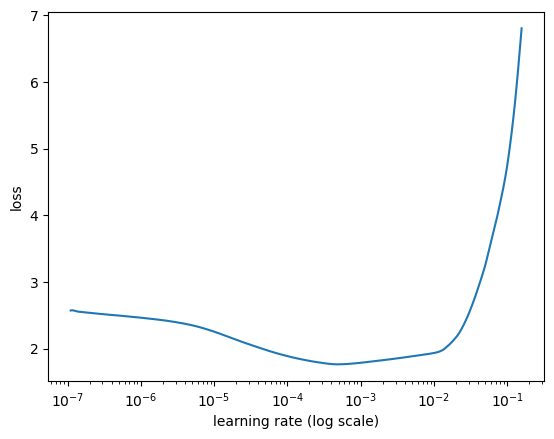

<Figure size 640x480 with 0 Axes>

In [24]:
learner.lr_plot()


In [ ]:
#print(dir(ktrain))


In [15]:
# Define the EarlyStopping callback
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)



In [16]:
#learner.fit_onecycle(1e-3, 12)


In [17]:
%%time
#0.0007
#learner.fit_onecycle(lr=1e-3, epochs=4, callbacks=[early_stopping]); 
#learner.fit(0.001, epochs=4, cycle_len=1, cycle_mult=2,callbacks=[early_stopping])

learner.autofit(5e-5, epochs=3,callbacks=[early_stopping])




begin training using triangular learning rate policy with max lr of 5e-05...
Epoch 1/3
6319/6319 [==============================] - 1935s 304ms/step - loss: 0.9470 - accuracy: 0.6987 - val_loss: 0.8245 - val_accuracy: 0.7324
Epoch 2/3
6319/6319 [==============================] - 1936s 306ms/step - loss: 0.7601 - accuracy: 0.7562 - val_loss: 0.8274 - val_accuracy: 0.7328
Epoch 3/3
6319/6319 [==============================] - 1903s 301ms/step - loss: 0.6280 - accuracy: 0.7990 - val_loss: 0.8760 - val_accuracy: 0.7275
CPU times: user 53min 55s, sys: 12min 32s, total: 1h 6min 28s
Wall time: 1h 36min 13s


In [ ]:
# plot the validation and test accuracy
learner.validate(class_names=preproc.get_classes())


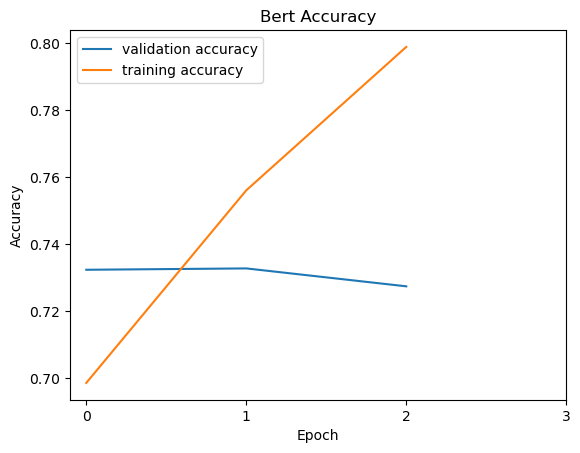

In [35]:
plt.plot(learner.history.history['val_accuracy'], label='validation accuracy')
plt.plot(learner.history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.grid()
epochs = range(0,4,1)
plt.xticks(epochs)
plt.title('Bert Accuracy')
plt.legend()
plt.show()

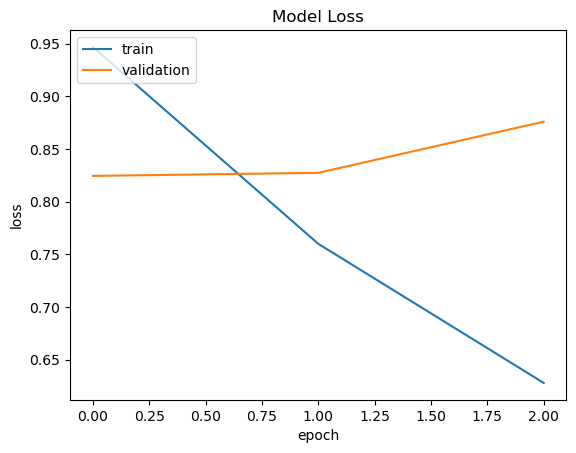

In [25]:
learner.plot('loss')
# plt.grid()
# epochs = range(1,3,1)
# plt.xticks(epochs)


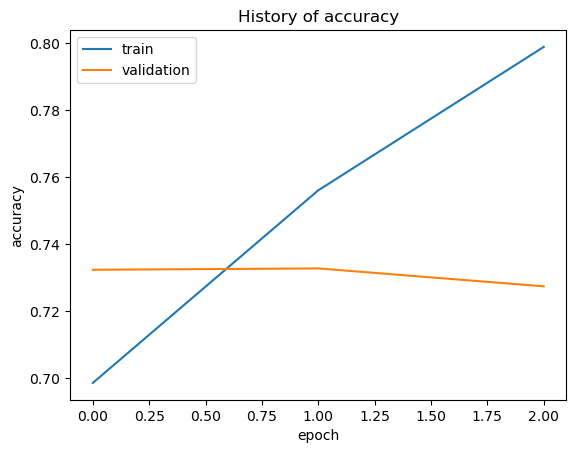

In [26]:
learner.plot('accuracy')


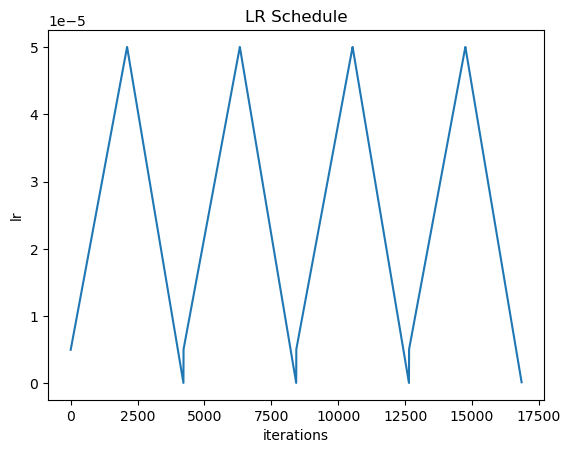

In [32]:
learner.plot('lr')


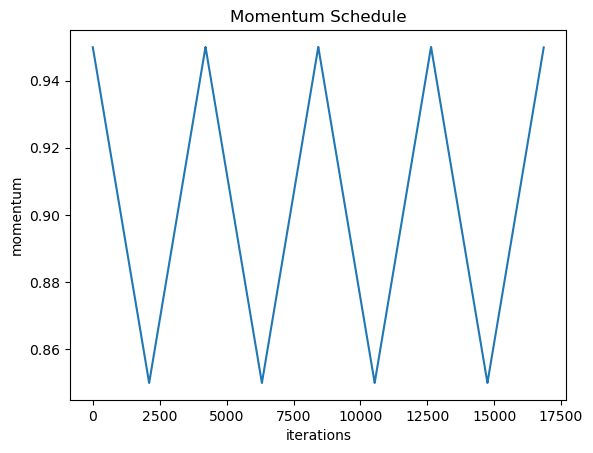

In [33]:
learner.plot('momentum')


In [30]:

#@ Get predictor using preproc dataset
predictor = ktrain.get_predictor(learner.model, preproc)   

In [31]:
classes = predictor.get_classes()  
classes
     

['Business & Finance',
 'Computers & Internet',
 'Education & Reference',
 'Entertainment & Music',
 'Family & Relationships',
 'Health',
 'Politics & Government',
 'Science & Mathematics',
 'Society & Culture',
 'Sports']

In [32]:
predictor.save('./save/bert_model3')
#predictor = ktrain.load_predictor('/save/bert_model2)


In [15]:
from ktrain import load_predictor

learner.load_model('save/bert_model3/')


In [33]:
from sklearn.metrics import roc_auc_score
y_pred = learner.model.predict(x_test, verbose=0)
score = roc_auc_score(y_test, y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.950570 



In [34]:
from sklearn.metrics import accuracy_score

y_pred = learner.model.predict(x_test, verbose=0)
score = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) / len(np.argmax(y_test, axis=1))
print("\n Accuracy_scor score: %.6f \n" % (score))


 Accuracy_scor score: 0.729037 



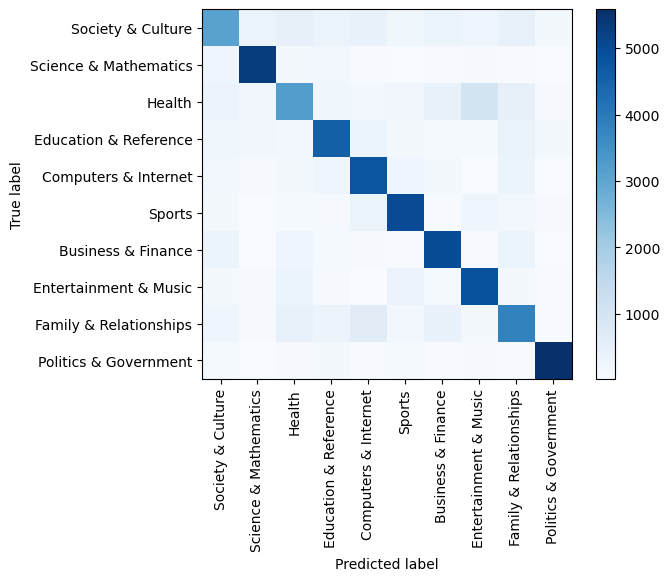

Accuracy: 0.7290367402333021


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet', 
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']

test_labels = y_test
# Make predictions on the test set
predictions = y_pred

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))

# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10), class_names, rotation=90)
plt.yticks(range(10), class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate and print the accuracy
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) / len(np.argmax(test_labels, axis=1))
print('Accuracy:', accuracy)


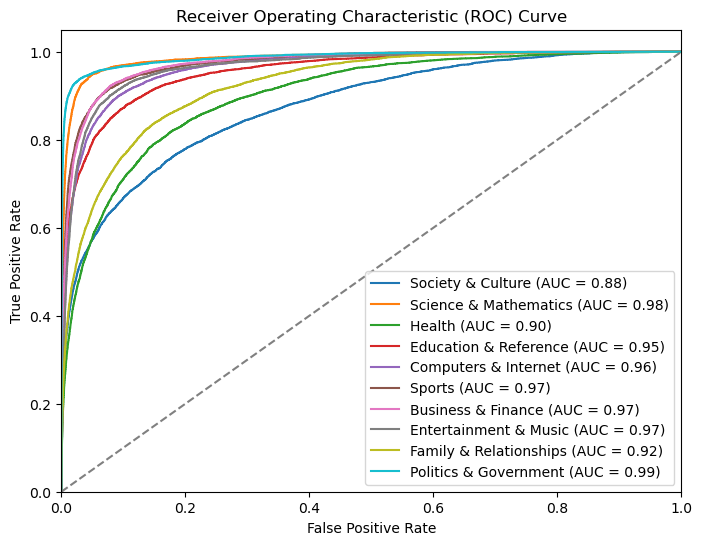

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl

mpl.rcParams['font.size'] = 10




# Make predictions on the test set
predictions =predictions

# Convert the labels to categorical format
test_labels_cat = test_labels

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from prettytable import PrettyTable




class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']


# Predict the probabilities for each class
y_pred = predictions

# Calculate the ROC curves and AUC for each class
num_classes = test_labels.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a table of ROC curves for each class
table = PrettyTable()
table.field_names = ['Class', 'AUC', 'TPR at FPR = 0.01', 'TPR at FPR = 0.05', 'TPR at FPR = 0.1']
for i in range(num_classes):
    tpr_01 = np.interp(0.01, fpr[i], tpr[i])
    tpr_05 = np.interp(0.05, fpr[i], tpr[i])
    tpr_10 = np.interp(0.1, fpr[i], tpr[i])
    class_name = class_names[i]
    table.add_row([class_name, round( roc_auc[i],2), round(tpr_01,2), round(tpr_05,2), round(tpr_10,2)])
print(table)

+------------------------+------+-------------------+-------------------+------------------+
|         Class          | AUC  | TPR at FPR = 0.01 | TPR at FPR = 0.05 | TPR at FPR = 0.1 |
+------------------------+------+-------------------+-------------------+------------------+
|   Society & Culture    | 0.88 |        0.38       |        0.57       |       0.67       |
| Science & Mathematics  | 0.98 |        0.8        |        0.95       |       0.97       |
|         Health         | 0.9  |        0.33       |        0.58       |       0.71       |
| Education & Reference  | 0.95 |        0.58       |        0.79       |       0.87       |
|  Computers & Internet  | 0.96 |        0.55       |        0.83       |       0.91       |
|         Sports         | 0.97 |        0.67       |        0.88       |       0.93       |
|   Business & Finance   | 0.97 |        0.62       |        0.88       |       0.94       |
| Entertainment & Music  | 0.97 |        0.53       |        0.85     

In [39]:
import statistics
statistics.mean(list(roc_auc.values()))

0.9505697765947773

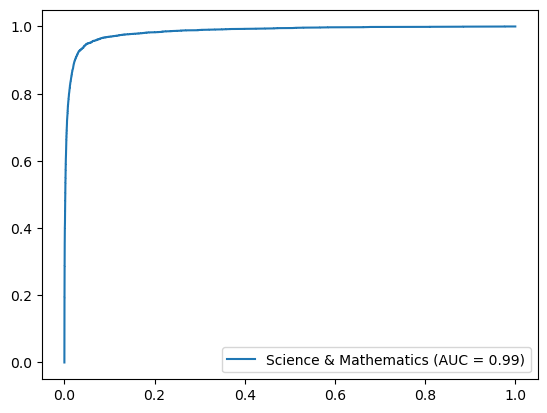

In [40]:
plt.plot(fpr[1], tpr[1], label='{} (AUC = {:.2f})'.format(class_names[1], roc_auc[i]))

plt.legend(loc='lower right')


In [20]:
# plot the validation and test accuracy
learner.validate(class_names=preproc.get_classes())


1935/1935 [==============================] - 170s 88ms/step
                        precision    recall  f1-score   support

    Business & Finance       0.61      0.50      0.55      6254
  Computers & Internet       0.84      0.88      0.86      6050
 Education & Reference       0.61      0.51      0.56      6210
 Entertainment & Music       0.72      0.73      0.72      6103
Family & Relationships       0.69      0.78      0.73      5905
                Health       0.77      0.80      0.79      6126
 Politics & Government       0.75      0.79      0.77      6149
 Science & Mathematics       0.73      0.79      0.76      6412
     Society & Culture       0.61      0.60      0.61      6287
                Sports       0.90      0.90      0.90      6398

              accuracy                           0.73     61894
             macro avg       0.72      0.73      0.72     61894
          weighted avg       0.72      0.73      0.72     61894



array([[3099,  373,  461,  354,  479,  249,  419,  275,  440,  105],
       [ 244, 5320,  117,  134,   53,   14,   36,   66,   36,   30],
       [ 399,  181, 3179,  253,  118,  157,  377,  945,  531,   70],
       [ 202,  195,  180, 4463,  321,  108,   87,   98,  321,  128],
       [ 156,   70,  101,  219, 4611,  240,  107,   12,  336,   53],
       [ 133,   26,  102,   93,  327, 4908,   65,  228,  183,   61],
       [ 327,   42,  254,  107,   89,   48, 4864,   62,  314,   42],
       [ 133,   61,  343,   93,   29,  368,   76, 5095,  160,   54],
       [ 286,   57,  417,  349,  616,  177,  402,  154, 3761,   68],
       [  68,   43,   68,  150,   59,   89,   57,   81,   55, 5728]])

In [22]:
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']


# Predict the probabilities for each class
y_pred = learner.model.predict(x_test, verbose=0)

In [23]:
from sklearn.metrics import classification_report
target_names = class_names
y_true = np.argmax(test_labels, axis=1) 
y_pred = np.argmax(y_pred, axis=1) 
print(classification_report(y_true=y_true,y_pred= y_pred, target_names=target_names))

                        precision    recall  f1-score   support

     Society & Culture       0.63      0.51      0.56      6053
 Science & Mathematics       0.83      0.87      0.85      6089
                Health       0.61      0.51      0.56      6276
 Education & Reference       0.73      0.73      0.73      6251
  Computers & Internet       0.70      0.78      0.74      6175
                Sports       0.77      0.81      0.79      6180
    Business & Finance       0.76      0.80      0.78      6194
 Entertainment & Music       0.71      0.79      0.75      6109
Family & Relationships       0.62      0.60      0.61      6331
 Politics & Government       0.90      0.90      0.90      6236

              accuracy                           0.73     61894
             macro avg       0.72      0.73      0.73     61894
          weighted avg       0.72      0.73      0.73     61894

